In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dulieu = pd.read_csv(r'/home/processed_dulieuxettuyendaihoc.csv')
print(dulieu)
#Phan1
#1.Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
sorted = dulieu.sort_values(by='DH1')
sorted.to_csv('/home/processed_dulieuxettuyendaihoc.csv', index=False)
print(sorted)
#2.Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính
gender_sorted = dulieu.sort_values(by='GT', kind='mergesort')
gender_sorted.to_csv('1.csv', index=False)
print(gender_sorted)
#3.Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT
pivot_table = dulieu.pivot_table(values='DH1', index='KT', aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])

# Đổi tên các cột
pivot_table.columns = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 'Q1', 'Q2', 'Q3']

# Hiển thị bảng pivot
print(pivot_table)

#4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT và KV
pivot_table_2 = dulieu.pivot_table(values='DH1', index=['KT','KV'] , aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])

# Đổi tên các cột
pivot_table_2.columns = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 'Q1', 'Q2', 'Q3']

# Hiển thị bảng pivot
print(pivot_table_2)

#5.. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1,Q2 và Q3 của DH1 theo KT, KV và DT
def Q1(g):
    return np.percentile(g,25)
def Q2(g):
    return np.percentile(g,5)
def Q3(g):
    return np.percentile(g,75)
def std(g):
    return np.std(g)

# Đổi tên các cột bằng cách sử dụng phương thức rename_axis()
pivot_table_3 = dulieu.pivot_table(values='DH1', index=['KT','KV','DT'] , aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std', Q1, Q2,Q3, std])
# Hiển thị bảng pivot
print(pivot_table_3)



    STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
0     1  7.2  7.3  6.3  7.3  7.0  7.9  7.3  5.5  8.4  ...  7.00  7.54  7.01   
1     2  5.4  3.9  3.9  4.0  5.4  5.4  5.3  2.8  6.3  ...  4.69  5.47  5.07   
2     3  5.6  6.8  7.2  7.5  4.3  7.4  5.8  3.2  5.0  ...  5.77  5.38  6.04   
3     4  6.6  6.4  5.3  6.9  5.4  7.3  6.4  5.8  5.1  ...  6.21  5.20  6.88   
4     5  6.0  5.0  6.0  7.3  6.5  7.7  7.9  6.1  5.4  ...  6.50  6.36  6.99   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
95   96  8.6  6.9  7.4  8.8  7.6  5.8  7.3  5.7  8.9  ...  7.43  7.42  6.83   
96   97  3.7  5.4  6.0  5.1  5.5  3.9  6.1  4.4  4.1  ...  4.93  5.15  6.39   
97   98  8.8  5.5  7.4  7.7  6.2  7.3  8.1  4.5  9.5  ...  7.05  7.84  7.67   
98   99  2.7  1.8  3.4  5.3  4.5  7.9  4.9  3.8  2.8  ...  4.15  4.72  5.29   
99  100  4.1  5.2  4.9  5.3  5.5  5.4  7.2  5.4  4.4  ...  5.26  5.72  5.85   

    XL1  XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT 

    STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
0    54  4.9  5.9  6.2  5.6  5.9  5.0  7.0  5.6  6.1  ...  5.69  6.26  6.02   
1    44  6.6  7.2  5.9  6.9  7.6  8.1  7.3  6.7  6.3  ...  7.05  6.61  6.77   
2    73  5.5  6.6  7.2  7.6  5.5  6.7  6.7  5.2  6.0  ...  6.20  5.88  6.22   
3     6  9.3  7.6  7.9  8.6  7.0  7.3  7.7  7.9  9.6  ...  7.96  8.54  7.38   
4    88  7.3  4.3  5.3  5.8  4.9  3.7  5.6  5.3  5.9  ...  5.44  5.78  6.48   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
95   85  8.4  7.4  6.0  7.8  6.3  7.2  8.5  6.0  9.3  ...  7.23  7.77  7.58   
96   12  7.9  7.0  9.1  8.6  6.1  7.0  5.6  9.0  8.2  ...  7.43  7.72  7.49   
97   24  5.3  6.3  5.7  6.9  5.9  7.5  6.6  5.1  6.4  ...  6.05  6.32  6.71   
98   25  2.4  4.1  3.6  5.5  5.9  5.6  4.9  4.2  3.3  ...  4.45  4.88  5.41   
99   98  8.8  5.5  7.4  7.7  6.2  7.3  8.1  4.5  9.5  ...  7.05  7.84  7.67   

    XL1  XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT 

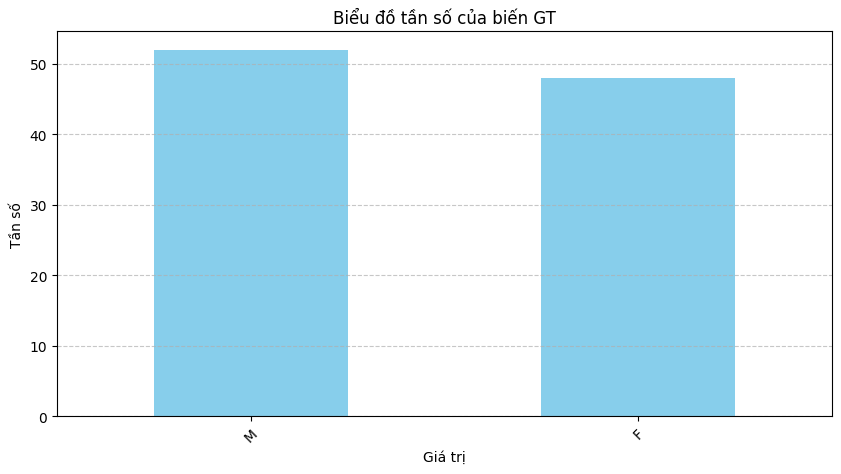

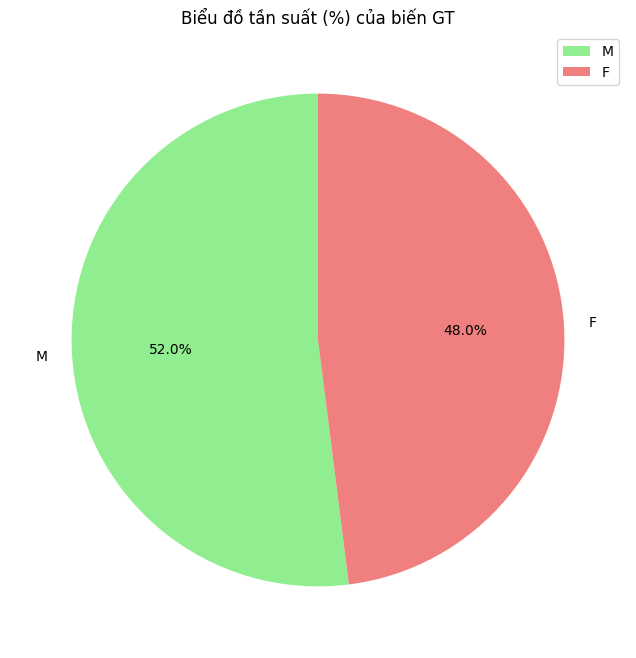

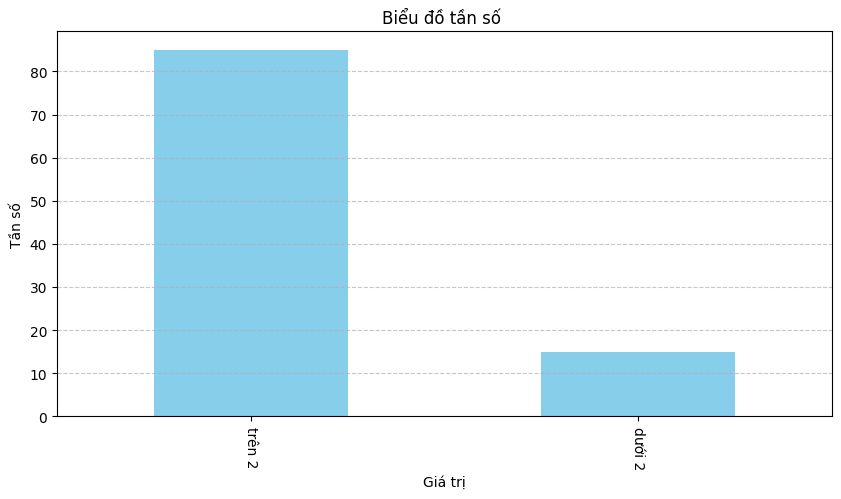

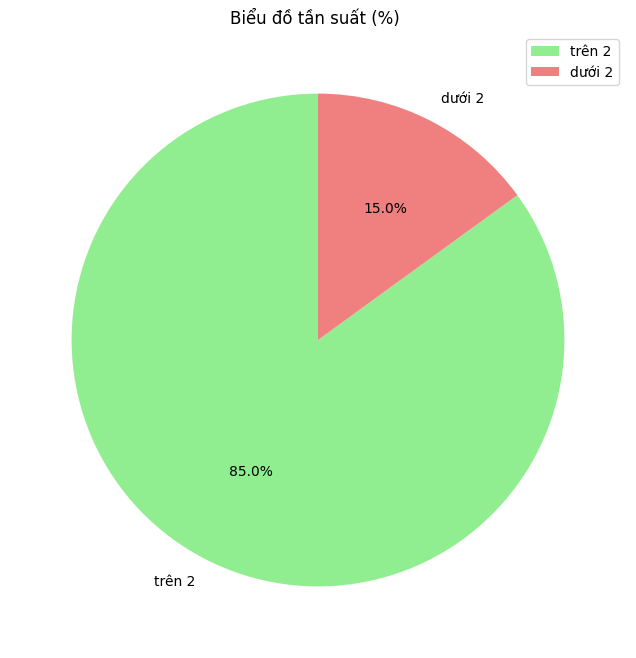

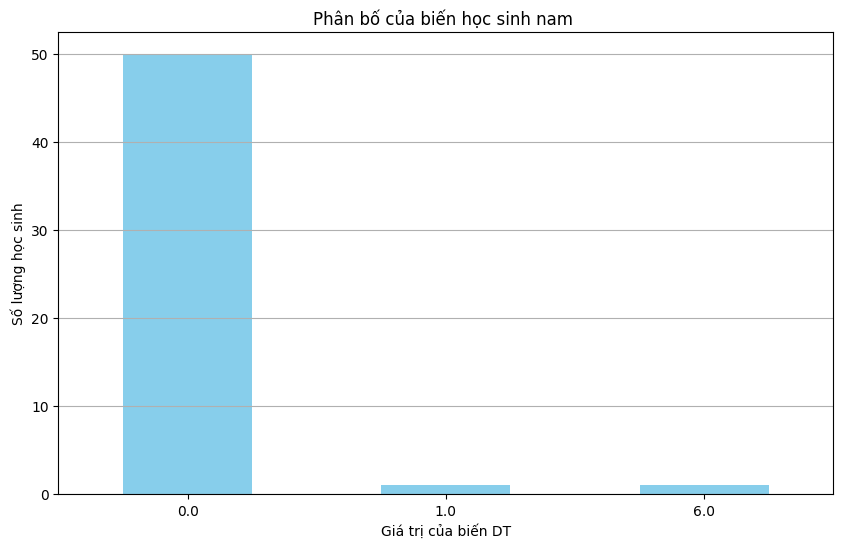

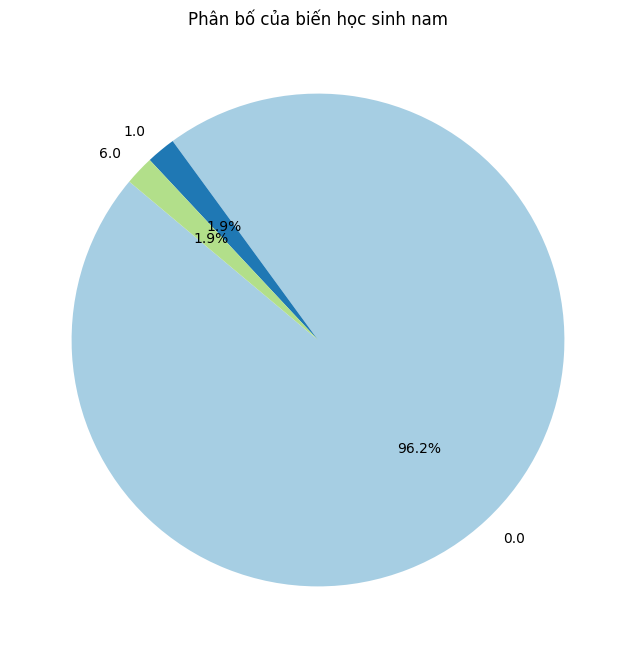

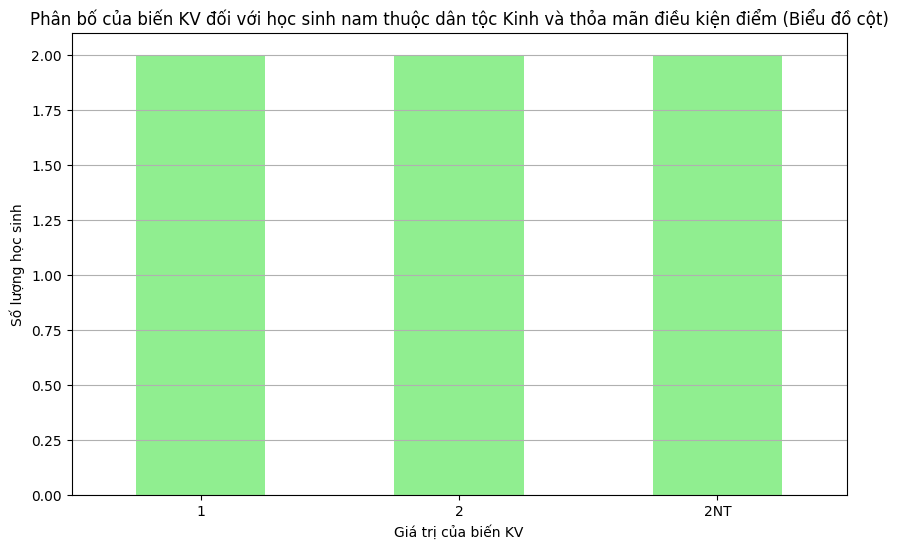

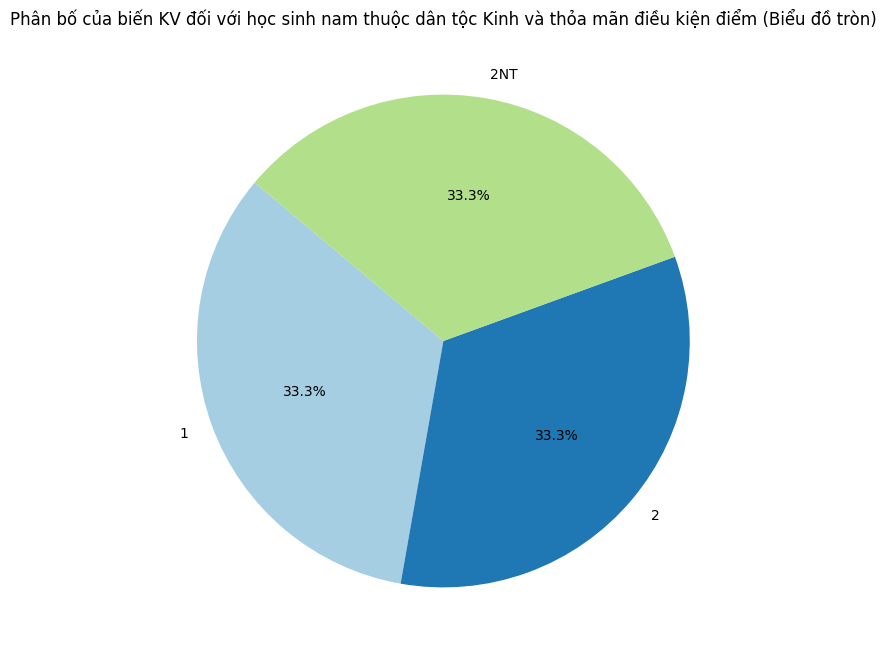

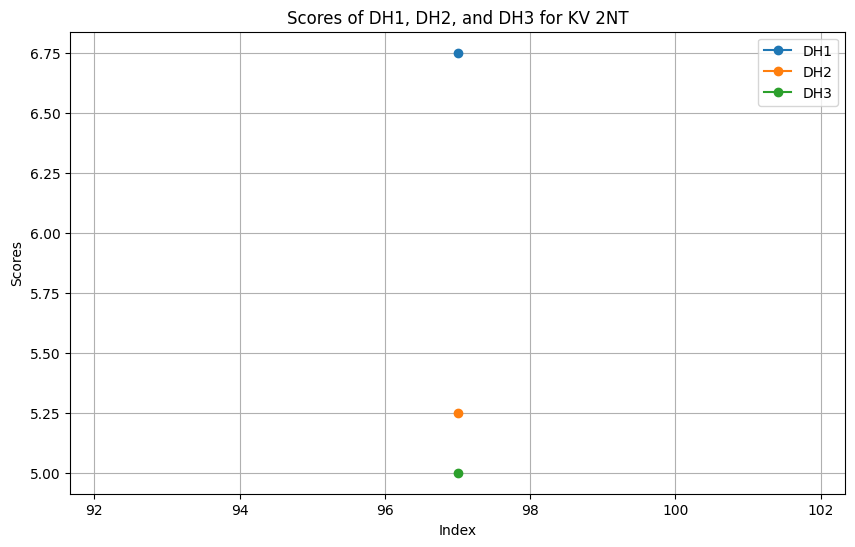

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dulieu = pd.read_csv(r'/home/processed_dulieuxettuyendaihoc.csv')
print(dulieu)
#Phan2
#1
#Biểu đồ cột
gender = dulieu['GT'].value_counts()
relative_gender = dulieu['GT'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 5))
gender.plot(kind='bar', color='skyblue')
plt.title('Biểu đồ tần số của biến GT')
plt.xlabel('Giá trị')
plt.ylabel('Tần số')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#Biểu đồ tròn
plt.figure(figsize=(8, 8))
relative_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Biểu đồ tần suất (%) của biến GT')
plt.ylabel('')
plt.legend(loc='best')
plt.show()
#2
dulieu['TBM1_group'] = pd.cut(dulieu['US_TBM1'], bins=[-float('inf'), 2, float('inf')], labels=['dưới 2', 'trên 2'])

# Đếm số lượng mỗi nhãn trong cột mới 'TBM1_group'
TBM1_counts = dulieu['TBM1_group'].value_counts()
relative_TBM1= TBM1_counts.value_counts(normalize=True) * 100
plt.figure(figsize=(10, 5))
TBM1_counts.plot(kind='bar', color='skyblue')
plt.title('Biểu đồ tần số ')
plt.xlabel('Giá trị')
plt.ylabel('Tần số')
plt.xticks(rotation=-90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#Biểu đồ tròn
plt.figure(figsize=(8, 8))
TBM1_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Biểu đồ tần suất (%) ')
plt.ylabel('')
plt.legend(loc='best')
plt.show()
#3
# Filter data for male students
male_students = dulieu[dulieu['GT'] == 'M']

# Get the distribution of DT for male students
dt_distribution = male_students['DT'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
dt_distribution.plot(kind='bar', color='skyblue')
plt.title('Phân bố của biến học sinh nam ')
plt.xlabel('Giá trị của biến DT')
plt.ylabel('Số lượng học sinh')
plt.xticks(rotation=0)
plt.grid(axis='y')
# Show plots
plt.show()

# Plot the pie chart
plt.figure(figsize=(8, 8))
dt_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Phân bố của biến học sinh nam')
plt.ylabel('')
# Show plots
plt.show()

#4
# Filter data for male students who belong to the Kinh ethnic group and meet the given conditions
filtered_students = male_students[
    (male_students['DT'] == 0) &
    (male_students['DH1'] >= 5.0) &
    (male_students['DH2'] >= 4.0) &
    (male_students['DH3'] >= 4.0)
]

# Get the distribution of KV for the filtered students
kv_distribution = filtered_students['KV'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
kv_distribution.plot(kind='bar', color='lightgreen')
plt.title('Phân bố của biến KV đối với học sinh nam thuộc dân tộc Kinh và thỏa mãn điều kiện điểm (Biểu đồ cột)')
plt.xlabel('Giá trị của biến KV')
plt.ylabel('Số lượng học sinh')
plt.xticks(rotation=0)
plt.grid(axis='y')


# Plot the pie chart
plt.figure(figsize=(8, 8))
kv_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Phân bố của biến KV đối với học sinh nam thuộc dân tộc Kinh và thỏa mãn điều kiện điểm (Biểu đồ tròn)')
plt.ylabel('')

# Show plots
plt.show()

#5
# Filter the dataframe for DH1, DH2, DH3 >= 5.0 and 'KV' == '2NT'

filtered_data = dulieu[(dulieu['DH1'] >= 5.0) & (dulieu['DH2'] >= 5.0) & (dulieu['DH3'] >= 5.0) & (dulieu['KV'] == '2NT')]

# Select only the relevant columns to display
filtered_data = filtered_data[['DH1', 'DH2', 'DH3', 'KV']]

# Plotting the filtered data using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['DH1'], marker='o', linestyle='-', label='DH1')
plt.plot(filtered_data.index, filtered_data['DH2'], marker='o', linestyle='-', label='DH2')
plt.plot(filtered_data.index, filtered_data['DH3'], marker='o', linestyle='-', label='DH3')

# Adding titles and labels
plt.title('Scores of DH1, DH2, and DH3 for KV 2NT')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


    STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
0    54  4.9  5.9  6.2  5.6  5.9  5.0  7.0  5.6  6.1  ...  5.69  6.26  6.02   
1    44  6.6  7.2  5.9  6.9  7.6  8.1  7.3  6.7  6.3  ...  7.05  6.61  6.77   
2    73  5.5  6.6  7.2  7.6  5.5  6.7  6.7  5.2  6.0  ...  6.20  5.88  6.22   
3     6  9.3  7.6  7.9  8.6  7.0  7.3  7.7  7.9  9.6  ...  7.96  8.54  7.38   
4    88  7.3  4.3  5.3  5.8  4.9  3.7  5.6  5.3  5.9  ...  5.44  5.78  6.48   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
95   85  8.4  7.4  6.0  7.8  6.3  7.2  8.5  6.0  9.3  ...  7.23  7.77  7.58   
96   12  7.9  7.0  9.1  8.6  6.1  7.0  5.6  9.0  8.2  ...  7.43  7.72  7.49   
97   24  5.3  6.3  5.7  6.9  5.9  7.5  6.6  5.1  6.4  ...  6.05  6.32  6.71   
98   25  2.4  4.1  3.6  5.5  5.9  5.6  4.9  4.2  3.3  ...  4.45  4.88  5.41   
99   98  8.8  5.5  7.4  7.7  6.2  7.3  8.1  4.5  9.5  ...  7.05  7.84  7.67   

    XL1  XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT 

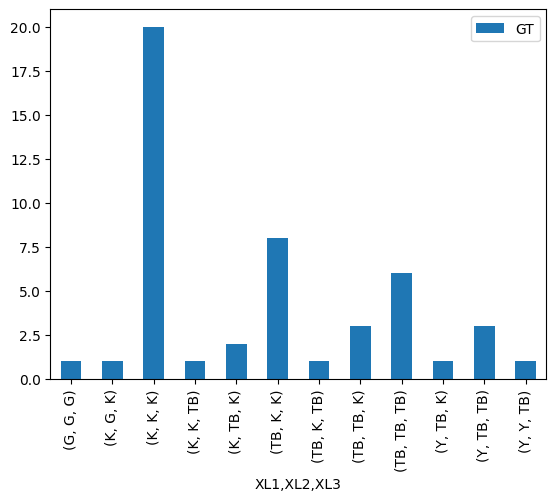

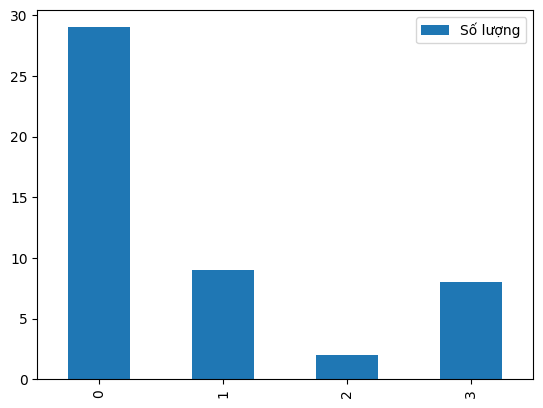

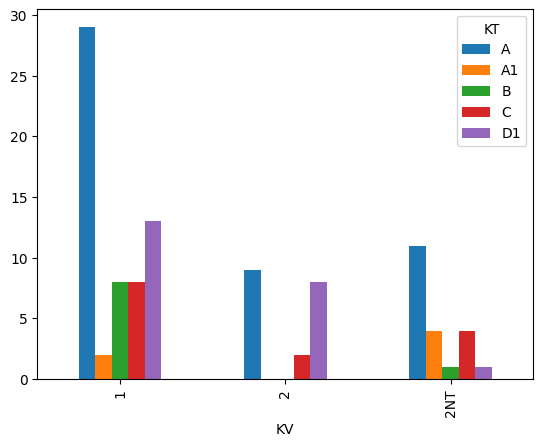

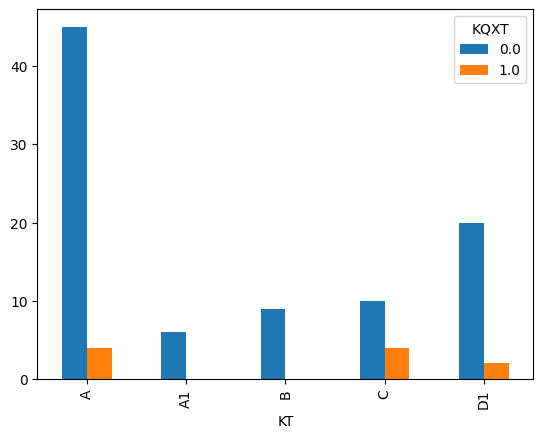

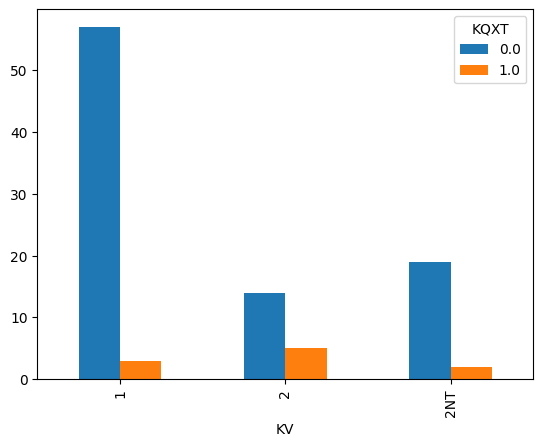

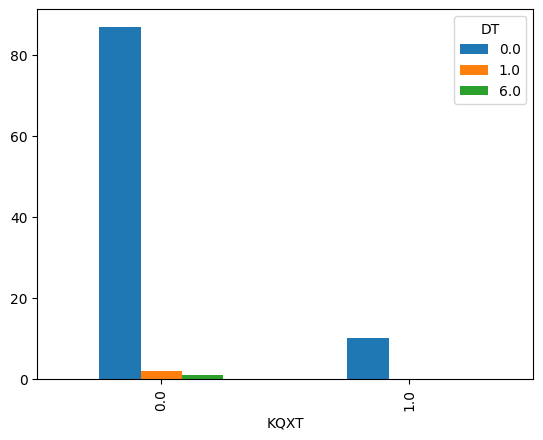

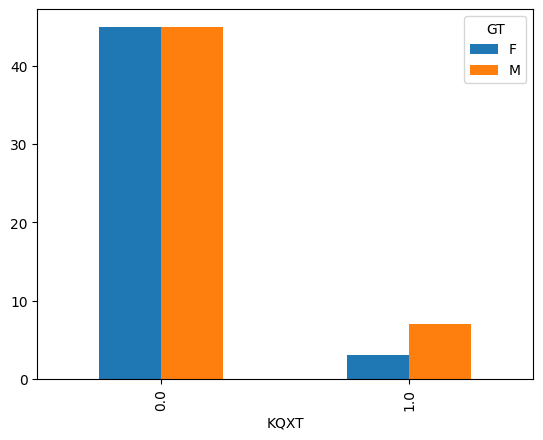

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dulieu = pd.read_csv(r'/home/processed_dulieuxettuyendaihoc.csv')
print(dulieu)
#Phần 3
#1
F_gender = dulieu[dulieu['GT']== 'F'].groupby(['XL1','XL2','XL3'])[['GT']].count()
F_gender.unstack
F_gender.plot.bar()
plt.show()

#2
filtered_data = dulieu[(dulieu['KT'].isin(['A', 'A1', 'B'])) & (dulieu['KV'].isin(['1', '2']))]
filtered_data =filtered_data.groupby(['KT', 'KV']).size().reset_index(name='Số lượng')
filtered_data.plot.bar()
plt.show()

#3
# Count occurrences of each KV value, creating a Series
filtered_data = dulieu.groupby(['KV', 'KT']).size().unstack().fillna(0)

# Plot the bar chart directly from the Series
filtered_data.plot.bar()
plt.show()

#4
filtered_data = dulieu.groupby(['KT', 'KQXT']).size().unstack().fillna(0)

# Plot the bar chart directly from the Series
filtered_data.plot.bar()
plt.show()

#5
filtered_data = dulieu.groupby(['KV', 'KQXT']).size().unstack().fillna(0)

# Plot the bar chart directly from the Series
filtered_data.plot.bar()
plt.show()

#6
filtered_data = dulieu.groupby(['KQXT', 'DT']).size().unstack().fillna(0)

# Plot the bar chart directly from the Series
filtered_data.plot.bar()
plt.show()

#7
filtered_data = dulieu.groupby(['KQXT', 'GT']).size().unstack().fillna(0)

# Plot the bar chart directly from the Series
filtered_data.plot.bar()
plt.show()


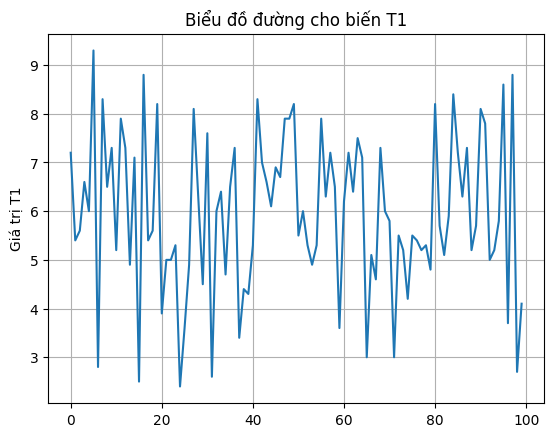

   STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM2  TBM3  XL1  \
0    1  7.2  7.3  6.3  7.3  7.0  7.9  7.3  5.5  8.4  ...  7.54  7.01    K   
1    2  5.4  3.9  3.9  4.0  5.4  5.4  5.3  2.8  6.3  ...  5.47  5.07    Y   
2    3  5.6  6.8  7.2  7.5  4.3  7.4  5.8  3.2  5.0  ...  5.38  6.04   TB   
3    4  6.6  6.4  5.3  6.9  5.4  7.3  6.4  5.8  5.1  ...  5.20  6.88   TB   
4    5  6.0  5.0  6.0  7.3  6.5  7.7  7.9  6.1  5.4  ...  6.36  6.99    K   

   XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT  phanlopt1  
0    K    K    2.800    3.016    2.804   0.0        kha  
1   TB   TB    1.876    2.188    2.028   0.0         tb  
2   TB   TB    2.308    2.152    2.416   1.0         tb  
3   TB    K    2.484    2.080    2.752   0.0         tb  
4   TB    K    2.600    2.544    2.796   0.0         tb  

[5 rows x 67 columns]
            T1              phanlopt1             
phanlopt1 gioi  kem kha  tb      gioi  kem kha  tb
T1                                                
2.4        Na

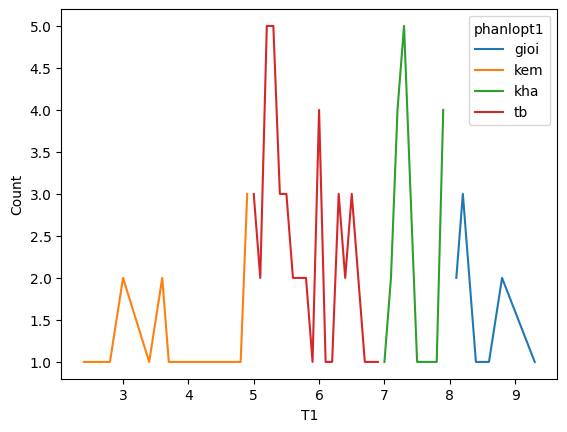

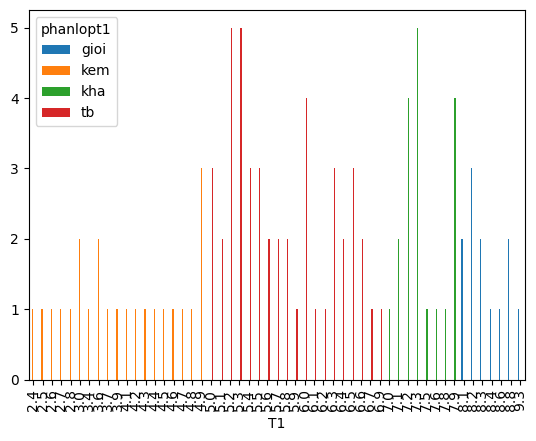

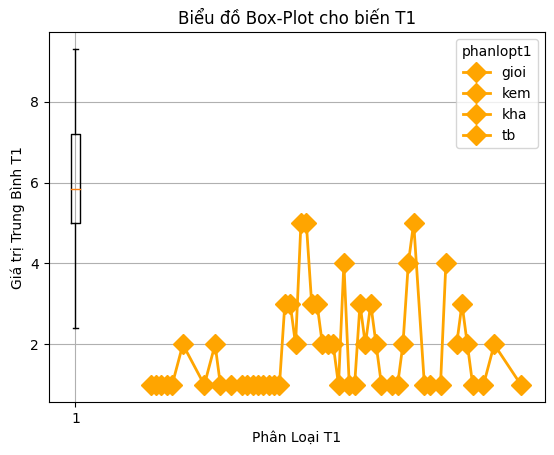

Skewness: -0.17824317486762223
Kurtosis: -0.48010360836580634


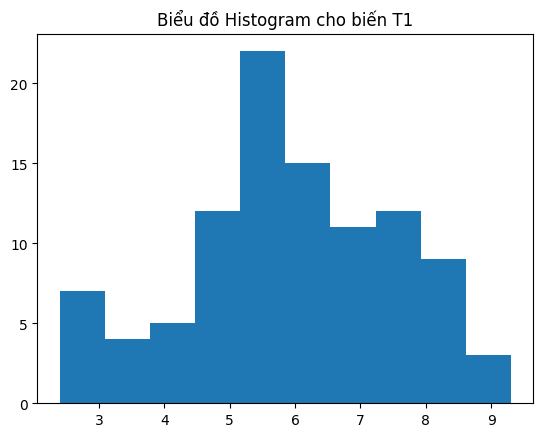

Skewness: 1.3007892548494826
Kurtosis: 0.8323915133108533


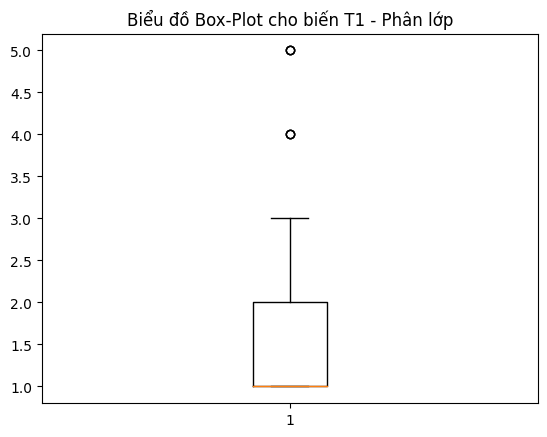

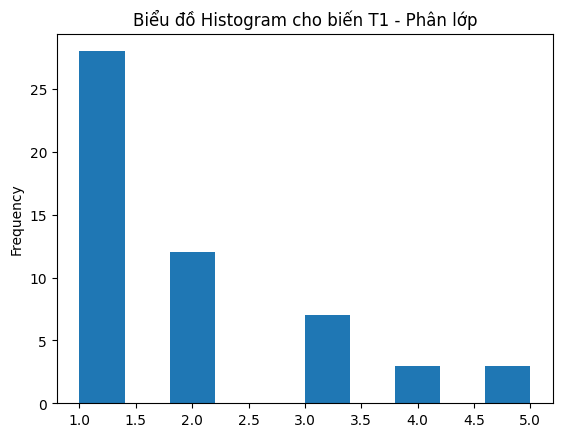

Covariance: 0.11283838383838381
Correlation: 0.04925439216104145


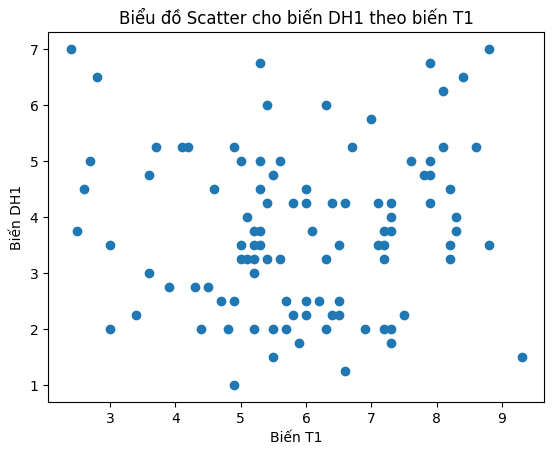

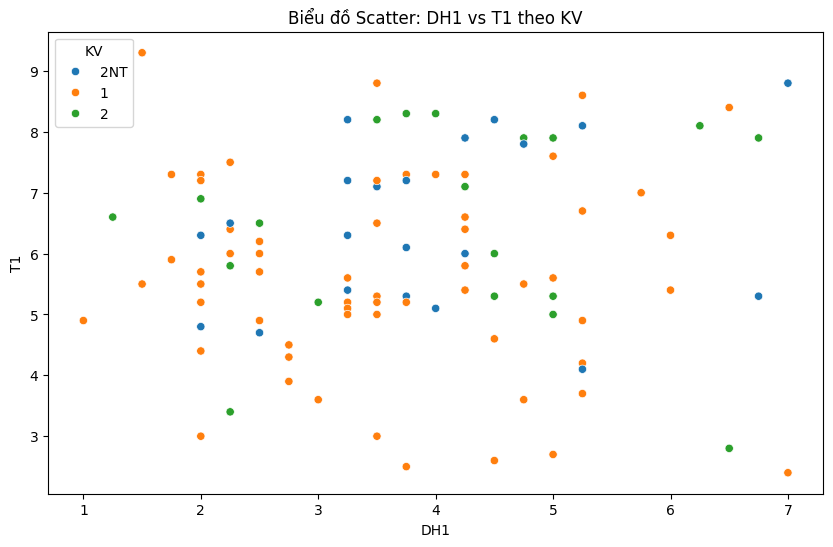

Ma trận tương quan giữa DH1, DH2 và DH3:
          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


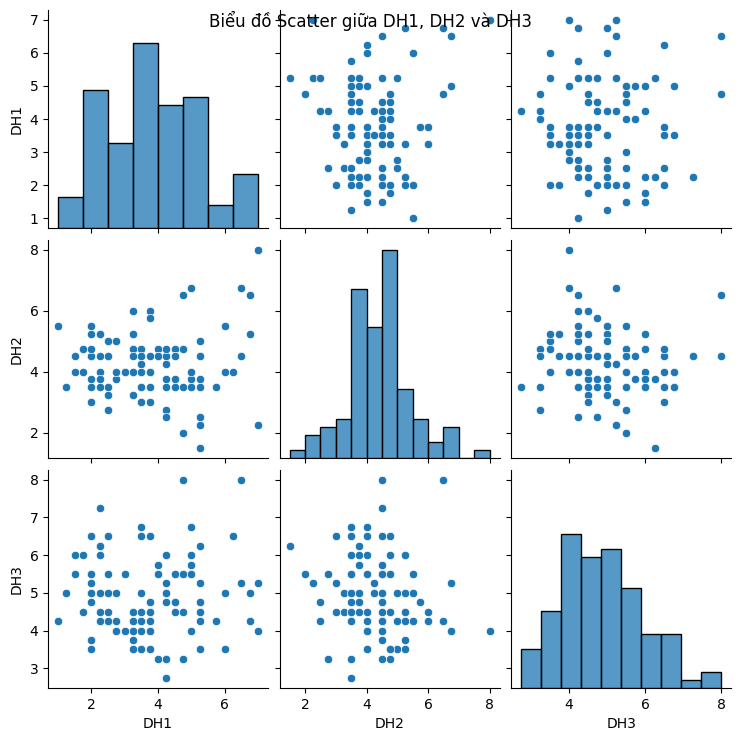

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dulieu = pd.read_csv(r'/home/processed_dulieuxettuyendaihoc.csv')
#Phần 4
#1
plt.plot(dulieu['T1'])
plt.title('Biểu đồ đường cho biến T1')
plt.ylabel('Giá trị T1')
plt.grid(True)  # Hiển thị lưới
plt.show()
#2
dulieu.loc[(dulieu['T1']<5), 'phanlopt1'] ='kem'
dulieu.loc[(dulieu['T1']>=5), 'phanlopt1'] ='tb'
dulieu.loc[(dulieu['T1']>=7), 'phanlopt1'] ='kha'
dulieu.loc[(dulieu['T1']>=8), 'phanlopt1'] ='gioi'
print(dulieu.head(5))
#3
dulieuphanlopt1=dulieu.groupby(['T1', 'phanlopt1'])[['T1','phanlopt1']].count()
unstackphanlopt1=dulieuphanlopt1.unstack()
print(unstackphanlopt1.head(10))
#4
unstackphanlopt1['phanlopt1'].plot(ylabel='Count')
unstackphanlopt1['phanlopt1'].plot.bar()
plt.show()
#5
# Plotting the Drop-line chart
unstackphanlopt1['phanlopt1'].plot(marker='D', color='orange', linestyle='-', linewidth=2, markersize=10)
plt.title('Biểu đồ Drop-line ')
plt.xlabel('Phân Loại T1')
plt.ylabel('Giá trị Trung Bình T1')
plt.grid(True)

#Phần 5
#1
# Vẽ biểu đồ Box-Plot
plt.boxplot(dulieu['T1'])
plt.title('Biểu đồ Box-Plot cho biến T1')
plt.show()

# Mô tả hình dáng lệch
print("Skewness:", dulieu['T1'].skew())
print("Kurtosis:", dulieu['T1'].kurtosis())
# Vẽ biểu đồ Histogram
plt.hist(dulieu['T1'])
plt.title('Biểu đồ Histogram cho biến T1')
plt.show()

#2
# Mô tả hình dáng lệch
print("Skewness:", dulieuphanlopt1['T1'].skew())
print("Kurtosis:", dulieuphanlopt1['T1'].kurtosis())

# Vẽ biểu đồ Box-Plot
plt.boxplot(dulieuphanlopt1['T1'])
plt.title('Biểu đồ Box-Plot cho biến T1 - Phân lớp')
plt.show()

# Vẽ biểu đồ Histogram
dulieuphanlopt1['T1'].plot.hist()
plt.title(f'Biểu đồ Histogram cho biến T1 - Phân lớp')
plt.show()
#3
# Nhận xét giá trị Covariance và Correlation
covariance = dulieu['T1'].cov(dulieu['DH1'])
correlation = dulieu['T1'].corr(dulieu['DH1'])

print("Covariance:", covariance)
print("Correlation:", correlation)

# Vẽ biểu đồ Scatter
plt.scatter(dulieu['T1'], dulieu['DH1'])
plt.title('Biểu đồ Scatter cho biến DH1 theo biến T1')
plt.xlabel('Biến T1')
plt.ylabel('Biến DH1')
plt.show()
#4
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dulieu, x='DH1', y='T1', hue='KV')
plt.title('Biểu đồ Scatter: DH1 vs T1 theo KV')
plt.xlabel('DH1')
plt.ylabel('T1')
plt.show()
#5
# Tạo ma trận tương quan
correlation_matrix = dulieu[['DH1', 'DH2', 'DH3']].corr()

# Hiển thị ma trận tương quan
print("Ma trận tương quan giữa DH1, DH2 và DH3:")
print(correlation_matrix)

# Vẽ biểu đồ Scatter giữa các biến
sns.pairplot(dulieu[['DH1', 'DH2', 'DH3']])
plt.suptitle('Biểu đồ Scatter giữa DH1, DH2 và DH3')
plt.show()
